In [20]:
import tensorflow as tf
from tensorflow import keras


In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(60000, 28, 28)
(60000,)


KeyboardInterrupt: 

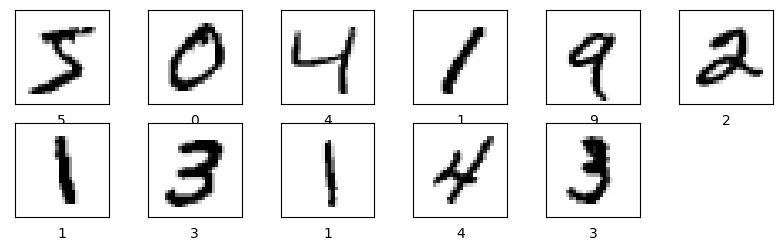

In [22]:
# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # From Tf "Hello World" recommendation

#normalize the data -> representing numbers in memory is to put them on a 0 to 255 scale (8 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)

#plot the  first 42 images in the dataset
plt.figure(figsize=(10,10))
for i in range(42):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### Building models for recognizing digits:
As a start implement a linear model  h = Wx - $ \theta\ $ . Initialize W £ R^ 10,784 and $ \theta\ $ £ R ^10  with zeros



In [30]:

# Initialize the weight matrix W ∈ R10×784 to random values
# Initialize the bias vector b ∈ R10 to random values

W = np.zeros((10, 784))
θ = np.zeros((10,1))

# Use the Adam optimizer (TF recommendation)
# Use the accuracy metric (TF recommendation)

# a) Use the softmax operation to normalize the output of the model

model = keras.Sequential([ #sequential ---> multiple layers in it that do different transformations on the data
    keras.layers.Input(x_train.shape[1:]), #input ---> input layer
    keras.layers.Flatten(), #flatten ---> flattens the input
    keras.layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:], use_bias = True, kernel_initializer='zeros', bias_initializer='zeros') #dense ---> fully connected layer
    
])  

# b) Use the categorical cross-entropy loss function
model.compile(
    # c) use a gradient descent algorithm with a constant learning rate η = 0.5.
    optimizer=keras.optimizers.Adam(learning_rate=0.5), #adam ---> tf recommendation for optimizer and this library
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
# d) Process the data in mini-batches. Use one mini-batch for each gradient descent step (one iteration). 
# e) Perform 10,000 iterations for this linear model.
history = model.fit(x_train, y_train, epochs=100, batch_size=600, validation_data = (x_test,y_test),verbose=True)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 2.6660 - accuracy: 0.8605 - val_loss: 1.3587 - val_accuracy: 0.8891
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 1.2438 - accuracy: 0.8911 - val_loss: 1.3314 - val_accuracy: 0.8910
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 1.4107 - accuracy: 0.8862 - val_loss: 1.3880 - val_accuracy: 0.9048
Epoch 4/100
100/10

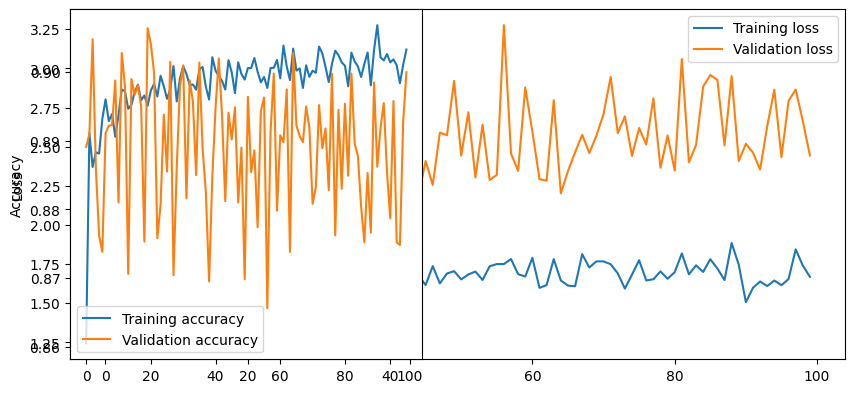

In [36]:
# Plot the results of the model 

fig = plt.figure(figsize=(10, 10))

# Plot the training and validation loss

ax1 = fig.add_subplot(211)

ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy

ax2 = fig.add_subplot(221)

ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


313/313 - 0s - loss: 2.4436 - accuracy: 0.9000 - 279ms/epoch - 890us/step
Test accuracy: 0.8999999761581421
313/313 [==============================] - 1s 877us/step


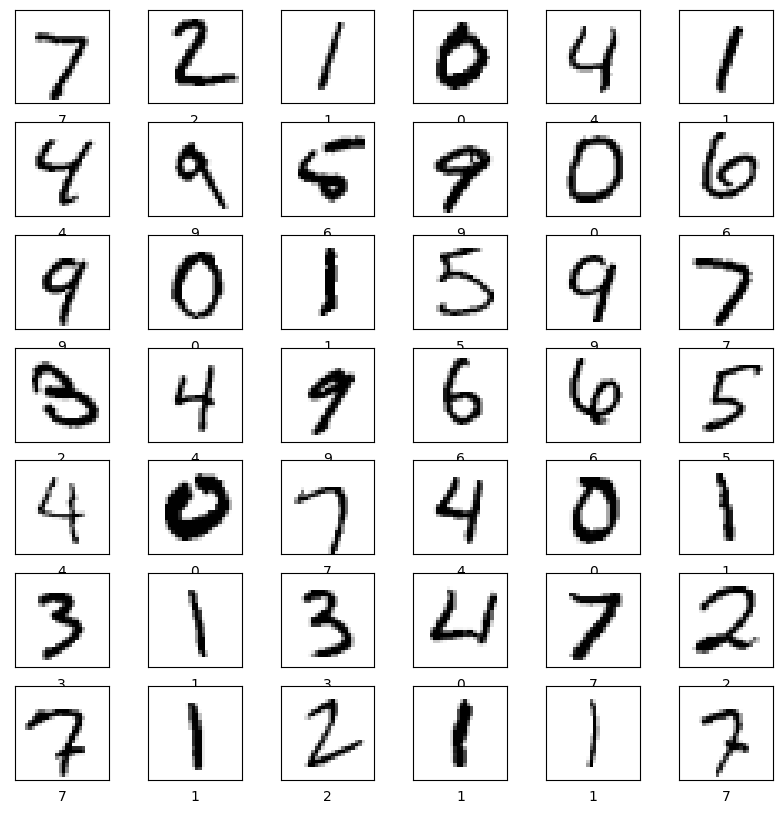

In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Predict the labels of the test set
predictions = model.predict(x_test)

# Plot the first 42 images in the test set and their predicted labels
plt.figure(figsize=(10,10))
for i in range(42):
    plt.subplot(7,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()

2. Implement a second model: A fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

In [ ]:
# create a MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer

layer = keras.layers.Dense(units = 1500, activation='relu')
layer(tf.zeros([10, 5]))


[<tf.Variable 'dense_15/kernel:0' shape=(5, 1500) dtype=float32, numpy=
 array([[ 0.06236847, -0.00156799,  0.00173801, ...,  0.00529504,
          0.04995747,  0.05616424],
        [-0.01186291, -0.04561599, -0.03487774, ...,  0.0572922 ,
          0.00400393, -0.05834961],
        [ 0.03163561, -0.04875074, -0.01435222, ..., -0.05744537,
         -0.01344422,  0.03801235],
        [ 0.03917226, -0.05251877,  0.05718071, ..., -0.00896931,
         -0.02221444, -0.0437502 ],
        [-0.06290779,  0.00172547,  0.05349589, ..., -0.04990708,
          0.04179157,  0.04088462]], dtype=float32)>,
 <tf.Variable 'dense_15/bias:0' shape=(1500,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>]

In [ ]:
#build a LSTM model with 2 LSTM layers with 1500 hidden neurons in each hidden layer

model = keras.Sequential([
    keras.layers.LSTM(1500, return_sequences=True),
    keras.layers.LSTM(1500),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#build the model 
model.build(input_shape=(None, 28, 28))

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 28, 1500)          9174000   
                                                                 
 lstm_5 (LSTM)               (None, 1500)              18006000  
                                                                 
 dense_38 (Dense)            (None, 10)                15010     
                                                                 
Total params: 27,195,010
Trainable params: 27,195,010
Non-trainable params: 0
_________________________________________________________________
